In [186]:
! gdown 14DoImQQ3OHZKgqmKwtBO8qysiZ3lTc1T           #M&M
! gdown 1-NQRpLjmTJQsuM9l48wuOHHReqC1GCRA           #HDFC
! gdown 1S0-qi3Zb3q_jq4YoboPNYdw2O3-1ZJSs           #VADILALIND
! gdown 1eBU6SCbINZiXXJDk4b6CZn8ii8IbgvkX           #IOC
! gdown 1iOGEPs-ySJ00KGrxkJT8QgX7E2_v4dqg           #JPPOWER

Downloading...
From: https://drive.google.com/uc?id=14DoImQQ3OHZKgqmKwtBO8qysiZ3lTc1T
To: /content/20-04-2022-TO-20-04-2023-M&M-EQ-N.csv
100% 26.0k/26.0k [00:00<00:00, 55.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-NQRpLjmTJQsuM9l48wuOHHReqC1GCRA
To: /content/20-04-2022-TO-20-04-2023-HDFC-EQ-N.csv
100% 26.4k/26.4k [00:00<00:00, 50.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S0-qi3Zb3q_jq4YoboPNYdw2O3-1ZJSs
To: /content/20-04-2022-TO-20-04-2023-VADILALIND-EQ-N.csv
100% 26.0k/26.0k [00:00<00:00, 43.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eBU6SCbINZiXXJDk4b6CZn8ii8IbgvkX
To: /content/20-04-2022-TO-20-04-2023-IOC-EQ-N.csv
100% 23.8k/23.8k [00:00<00:00, 52.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iOGEPs-ySJ00KGrxkJT8QgX7E2_v4dqg
To: /content/20-04-2022-TO-20-04-2023-JPPOWER-EQ-N.csv
100% 23.3k/23.3k [00:00<00:00, 47.6MB/s]


In [187]:
import math
import datetime 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler

import keras 
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [188]:
df1=pd.read_csv('20-04-2022-TO-20-04-2023-M&M-EQ-N.csv')
df2=pd.read_csv('20-04-2022-TO-20-04-2023-HDFC-EQ-N.csv')
df3=pd.read_csv('20-04-2022-TO-20-04-2023-VADILALIND-EQ-N.csv')
df4=pd.read_csv('20-04-2022-TO-20-04-2023-IOC-EQ-N.csv')
df5=pd.read_csv('20-04-2022-TO-20-04-2023-JPPOWER-EQ-N.csv')

In [189]:
df_list=[df1,df2,df3,df4,df5]
data=[None]*len(df_list)            #Creating lists with size the same as that of df_list
dataset=[None]*len(df_list)
scaled_data=[None]*len(df_list)
training_data_len=[None]*len(df_list)
train_data=[None]*len(df_list)
test_data=[None]*len(df_list)
x_train=[]
y_train=[]
x_test=[]
y_test=[]
predictions=[]

#Create a list of empty lists
num_lists = len(df_list)

# Create empty lists using a for loop
for _ in range(num_lists):
    empty_list = []
    x_train.append(empty_list)
    

for _ in range(num_lists):
    empty_list = []
    y_train.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    x_test.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    y_test.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    predictions.append(empty_list)


Cleaner function

In [190]:
#Function to change the index of dataframe to date
def chng_index(df):
  dt_li=[]
  for i in df.index:
    dt_li.append(datetime.datetime.strptime(df['Date  '][i],'%d-%m-%Y').date())
  
  df.index=dt_li

In [191]:
#Function to plot the data
def plotter(df):
  plt.figure(figsize=(16,8))
  plt.title('Close price history')
  plt.plot(df.index,df['Close Price  '])
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Close price '+df['Symbol  '][1],fontsize=18)
  plt.show()

In [ ]:
len(x_train[0])

0

In [ ]:
scaled_data[4]

In [192]:
#Function to extract the 'Close Price Column of the dataframes and scale the datasets
def extract(df,i):
  data[i]=df['Close Price  ']
  #convert the data into numpy array 
  dataset[i]=data[i].values
  dataset[i]=dataset[i].reshape(-1,1)
  scaler=MinMaxScaler(feature_range=(0,1))
  scaled_data[i]=scaler.fit_transform(dataset[i])




In [193]:
#Fuction to split the x training dataset 
def split_x_train(var):
  training_data_len[var]=math.ceil(len(dataset[var])*0.8)
  train_data[var]=scaled_data[var][0:training_data_len[var],:]

  #Splitting into x train and y train
  #x train will have the sets data values i.e. the past 60 days data divided into sets of (0,59), (1,60), (2,61) etc.
  #y train will have the target values, for each set the target value is the closing price of the next day, i.e. for x_train (0,59) the target will be the closing price of 60th day. 
  for j in range(60, len(train_data[var])):
    x_train[var].append(train_data[var][j-60:j,0])
    


In [194]:
#Fuction to split the y training dataset 
def split_y_train(var):
  for j in range(60, len(train_data[var])):
    y_train[var].append(train_data[var][j,0])

In [195]:
def convert(i):
  #currently x_train and y_train are simply lists, so we convert them to numpy arrays
  x_train[i], y_train[i]=np.array(x_train[i]), np.array(y_train[i])

In [196]:
def re_shp(i) :
  x_train[i]=np.reshape(x_train[i],(x_train[i].shape[0],x_train[i].shape[1],1))

  #For i=0, this statement is equivalent to np.reshape(x_train,(134,60,1))   134 instances, 60 features
  #LSTMs expect a 3D input

In [197]:
#Fuction to split the x testing dataset 
def split_x_test(i):
  test_data[i]=scaled_data[i][training_data_len[i]-60:,:]
  for j in range(60, len(test_data[i])):
   x_test[i].append(test_data[i][j-60:j,0])


In [198]:
def split_y_test(i):
  y_test[i]=dataset[i][training_data_len[i]:, :]
  

In [199]:
def conv_x_test(i):
#Convert test data set to numpy array
  x_test[i]=np.array(x_test[i])
#Reshape the data
  x_test[i]=np.reshape(x_test[i],(x_test[i].shape[0],x_test[i].shape[1],1))

In [200]:
def scale(i):
  scaler=MinMaxScaler(feature_range=(0,1))
  scaled_data[i]=scaler.fit_transform(dataset[i])
  predictions[i]=scaler.inverse_transform(predictions[i])

In [201]:
def cleaning(listt):
  for i in range (0,5):
    if not(listt[i].isnull().values.any()):
      chng_index(listt[i])
      # # plotter(listt[i])
      extract(listt[i],i)
      split_x_train(i)
      split_y_train(i)
      convert(i)
      re_shp(i)
      split_x_test(i)
      split_y_test(i)
      conv_x_test(i)
      #scale(i)

In [202]:
cleaning(df_list)

In [ ]:
print(x_train[0].shape,"\n",y_train[0].shape)

(134, 60, 1) 
 (134,)


In [ ]:
x_train[0]

array([[[0.03060736],
        [0.08751793],
        [0.105978  ],
        ...,
        [0.53065519],
        [0.58775705],
        [0.57034912]],

       [[0.08751793],
        [0.105978  ],
        [0.07412721],
        ...,
        [0.58775705],
        [0.57034912],
        [0.61406026]],

       [[0.105978  ],
        [0.07412721],
        [0.14328073],
        ...,
        [0.57034912],
        [0.61406026],
        [0.57465328]],

       ...,

       [[0.90349115],
        [0.82821616],
        [0.80698231],
        ...,
        [0.89210904],
        [0.98230512],
        [0.93122908]],

       [[0.82821616],
        [0.80698231],
        [0.78986131],
        ...,
        [0.98230512],
        [0.93122908],
        [0.93189861]],

       [[0.80698231],
        [0.78986131],
        [0.81578192],
        ...,
        [0.93122908],
        [0.93189861],
        [1.        ]]])

In [203]:
model1= load_model('M&M.h5')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Testing the model on the stock it was trained on
predictions[0]=model1.predict(x_test[0])
scale(0)
# predictions[0]=scaler.inverse_transform(predictions[0])

2/2 [==============================] - 0s 25ms/step


In [ ]:
#Transfer learning for HDFC Stock 
model2_on_1=keras.models.Sequential(model1.layers[:-1])
model2_on_1.add(Dense(1))


In [ ]:
#Cloning the model1
model1_clone = keras.models.clone_model(model1) 
model1_clone.set_weights(model1.get_weights())

In [ ]:
#Freezing the new models layers
for layer in model2_on_1.layers[:-1]: 
  layer.trainable = True

optimizer=keras.optimizers.Adam(lr=1e-4)
model2_on_1.compile(optimizer=optimizer, loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model2_on_1.fit(x_train[1], y_train[1], batch_size=1, epochs=15)

Epoch 1/15
134/134 [==============================] - 5s 35ms/step - loss: 0.0025
Epoch 2/15
134/134 [==============================] - 4s 31ms/step - loss: 0.0023
Epoch 3/15
134/134 [==============================] - 4s 33ms/step - loss: 0.0023
Epoch 4/15
134/134 [==============================] - 4s 29ms/step - loss: 0.0023
Epoch 5/15
134/134 [==============================] - 4s 30ms/step - loss: 0.0023
Epoch 6/15
134/134 [==============================] - 5s 35ms/step - loss: 0.0023
Epoch 7/15
134/134 [==============================] - 4s 28ms/step - loss: 0.0023
Epoch 8/15
134/134 [==============================] - 4s 29ms/step - loss: 0.0023
Epoch 9/15
134/134 [==============================] - 5s 36ms/step - loss: 0.0023
Epoch 10/15
134/134 [==============================] - 4s 29ms/step - loss: 0.0022
Epoch 11/15
134/134 [==============================] - 4s 29ms/step - loss: 0.0023
Epoch 12/15
134/134 [==============================] - 5s 37ms/step - loss: 0.0022
Epoch 13/15
1

In [ ]:
predictions[1]=model2_on_1.predict(x_test[1])
scale(1)

2/2 [==============================] - 0s 48ms/step


In [ ]:
rmse=np.sqrt(np.mean(predictions[1]-y_test[1])**2)
rmse

4.328192138671862

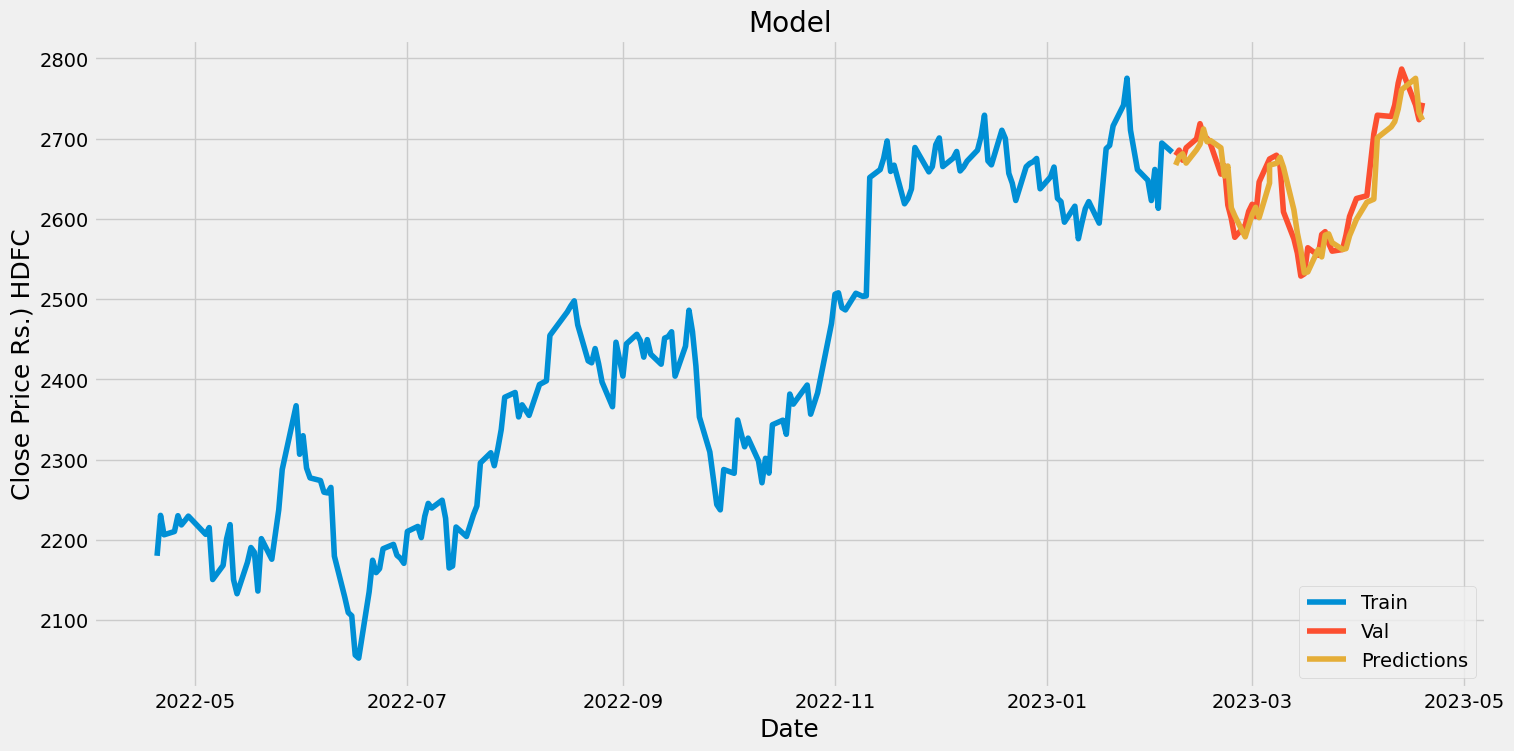

In [ ]:
train=data[1][:training_data_len[1]]
valid=data[1][training_data_len[1]:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions[1]
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.) HDFC', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
model2_on_1.save('HDFC.h5')

In [ ]:
#Transfer learning for Vadilal Stock 
model3_on_1=keras.models.Sequential(model1.layers[:-1])
model3_on_1.add(Dense(1))


In [ ]:
for layer in model3_on_1.layers[:-1]: 
  layer.trainable = True

optimizer=keras.optimizers.Adam(lr=1e-4)
model3_on_1.compile(optimizer=optimizer, loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model3_on_1.fit(x_train[2], y_train[2], batch_size=1, epochs=100)

Epoch 1/100
133/133 [==============================] - 7s 30ms/step - loss: 0.0901
Epoch 2/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0050
Epoch 3/100
133/133 [==============================] - 4s 30ms/step - loss: 0.0039
Epoch 4/100
133/133 [==============================] - 4s 29ms/step - loss: 0.0035
Epoch 5/100
133/133 [==============================] - 5s 36ms/step - loss: 0.0031
Epoch 6/100
133/133 [==============================] - 4s 31ms/step - loss: 0.0029
Epoch 7/100
133/133 [==============================] - 4s 29ms/step - loss: 0.0029
Epoch 8/100
133/133 [==============================] - 4s 34ms/step - loss: 0.0028
Epoch 9/100
133/133 [==============================] - 4s 32ms/step - loss: 0.0028
Epoch 10/100
133/133 [==============================] - 4s 28ms/step - loss: 0.0026
Epoch 11/100
133/133 [==============================] - 5s 34ms/step - loss: 0.0027
Epoch 12/100
133/133 [==============================] - 4s 34ms/step - loss: 0.0026
E

In [ ]:
predictions[2]=model3_on_1.predict(x_test[2])
scale(2)

2/2 [==============================] - 1s 25ms/step


In [ ]:
rmse=np.sqrt(np.mean(predictions[2]-y_test[2])**2)
rmse
#Initial error after unfreezinmg just the o/p layer 

654.5575449625651

In [ ]:
rmse=np.sqrt(np.mean(predictions[2]-y_test[2])**2)
rmse

23.35706431070965

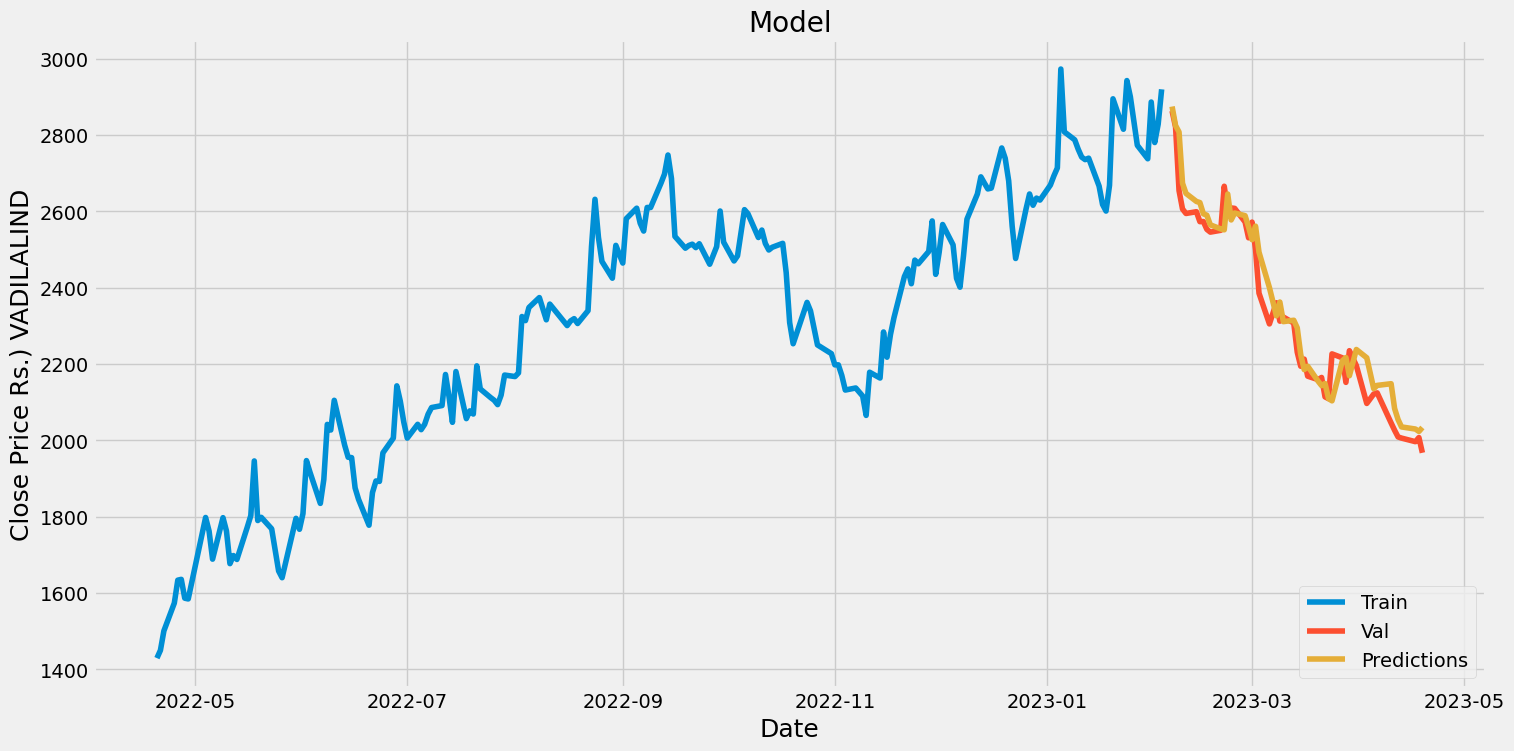

In [ ]:
train=data[2][:training_data_len[2]]
valid=data[2][training_data_len[2]:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions[2]
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.) VADILALIND', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close Price,Predictions
2023-02-06,2863.70,2875.129639
2023-02-07,2821.20,2825.170654
2023-02-08,2654.75,2808.246094
2023-02-09,2606.55,2673.927246
2023-02-10,2594.80,2647.400391
2023-02-13,2599.45,2626.364746
2023-02-14,2573.40,2623.322754
2023-02-15,2573.65,2593.963623
2023-02-16,2553.20,2590.196045
2023-02-17,2545.95,2565.001221


In [204]:
model3_on_1.save('VADILALIND.h5')

In [218]:
#Transfer learning for IOC Stock 
model4_on_1=keras.models.Sequential(model1.layers[:-1])
model4_on_1.add(Dense(1))

In [219]:
for layer in model4_on_1.layers[:-1]: 
  layer.trainable = False

optimizer=keras.optimizers.Adam(lr=1e-4)
model4_on_1.compile(optimizer=optimizer, loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [220]:
model4_on_1.fit(x_train[3], y_train[3], batch_size=1, epochs=5)

Epoch 1/5
133/133 [==============================] - 4s 10ms/step - loss: 0.0149
Epoch 2/5
133/133 [==============================] - 1s 9ms/step - loss: 0.0113
Epoch 3/5
133/133 [==============================] - 1s 9ms/step - loss: 0.0087
Epoch 4/5
133/133 [==============================] - 1s 9ms/step - loss: 0.0069
Epoch 5/5
133/133 [==============================] - 2s 12ms/step - loss: 0.0057


In [221]:
predictions[3]=model4_on_1.predict(x_test[3])
scale(3)

2/2 [==============================] - 1s 26ms/step


In [222]:
rmse=np.sqrt(np.mean(predictions[3]-y_test[3])**2)
rmse

7.420684051513672

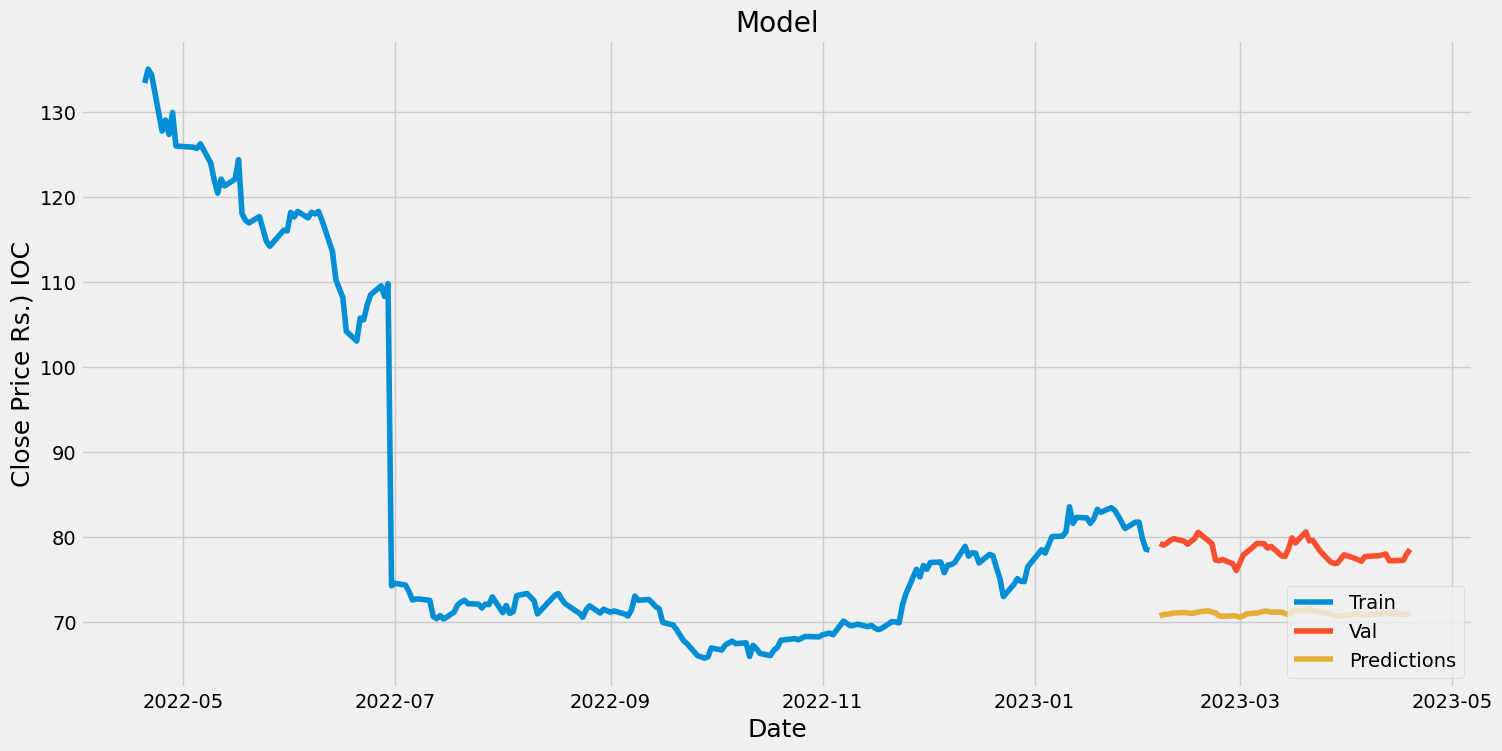

In [223]:
train=data[3][:training_data_len[3]]
valid=data[3][training_data_len[3]:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions[3]
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.) IOC', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [225]:
valid

,Close Price,Predictions
2023-02-06,79.25,70.693275
2023-02-07,79.05,70.882027
2023-02-08,79.25,70.904305
2023-02-09,79.60,70.966026
2023-02-10,79.80,71.054153
2023-02-13,79.50,71.113983
2023-02-14,79.15,71.071617
2023-02-15,79.50,71.009026
2023-02-16,79.80,71.081802
2023-02-17,80.55,71.164871


In [224]:
model4_on_1.save('IOC.h5')

In [227]:
#Transfer learning for JPPOWER Stock 
model5_on_1=keras.models.Sequential(model1.layers[:-1])
model5_on_1.add(Dense(1))

In [236]:
for layer in model4_on_1.layers[:-1]: 
  layer.trainable = True

optimizer=keras.optimizers.Adam(lr=1e-4)
model4_on_1.compile(optimizer=optimizer, loss='mean_squared_error')

In [237]:
model4_on_1.fit(x_train[4], y_train[4], batch_size=1, epochs=50)

Epoch 1/50
133/133 [==============================] - 7s 30ms/step - loss: 0.0362
Epoch 2/50
133/133 [==============================] - 6s 42ms/step - loss: 0.0096
Epoch 3/50
133/133 [==============================] - 4s 30ms/step - loss: 0.0070
Epoch 4/50
133/133 [==============================] - 4s 30ms/step - loss: 0.0056
Epoch 5/50
133/133 [==============================] - 5s 37ms/step - loss: 0.0052
Epoch 6/50
133/133 [==============================] - 4s 29ms/step - loss: 0.0046
Epoch 7/50
133/133 [==============================] - 4s 31ms/step - loss: 0.0045
Epoch 8/50
133/133 [==============================] - 6s 49ms/step - loss: 0.0044
Epoch 9/50
133/133 [==============================] - 4s 29ms/step - loss: 0.0043
Epoch 10/50
133/133 [==============================] - 4s 29ms/step - loss: 0.0042
Epoch 11/50
133/133 [==============================] - 5s 37ms/step - loss: 0.0042
Epoch 12/50
133/133 [==============================] - 4s 28ms/step - loss: 0.0042
Epoch 13/50
1

In [230]:
predictions[4]=model5_on_1.predict(x_test[4])
scale(4)

2/2 [==============================] - 1s 17ms/step


In [232]:
rmse=np.sqrt(np.mean(predictions[4]-y_test[4])**2)
rmse

1.0568376084168751

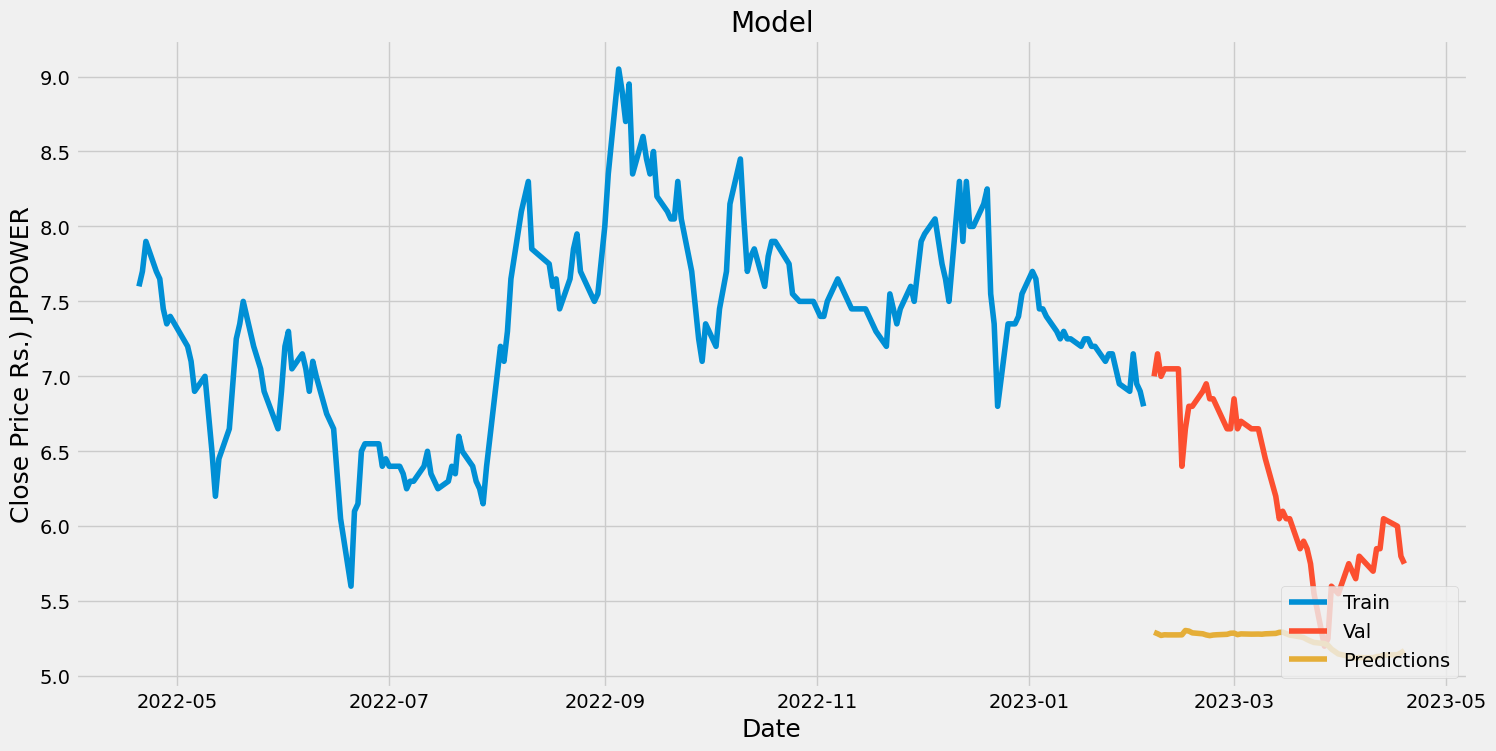

In [233]:
train=data[4][:training_data_len[4]]
valid=data[4][training_data_len[4]:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions[4]
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.) JPPOWER', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Recommender

In [ ]:
! gdown -- 1amHqFFKtiXSA1yLN1Ca5ugL_cOx7GkQZ

import pandas as pd
import re 
df = pd.read_csv('Ticker+Sector.csv')

main=df[['Issuer Name','Security Id','Igroup Name']]          #Store these 3 columns of dataframe in another dataframe named main
main2=main                                                    #copy these values into another dataframe named main2 
main3=pd.DataFrame()                                          #create a new dataframe main3 

for i in main2.index:                                         #The indices range from 0 to 4093, and i iterates over each of these rows   
  if(main2.at[i,'Igroup Name']=='-'):                         #This line matches the content of cell in column 'igroup name' and row i with the symbol '-'  
    main2.drop(index=[i],inplace=True)                        #if the content matches then drop that row
#main2                                                        #cleaned dataframe




count=0
#for i in main2.index:                                        #loop to check if the dataframe is cleaned
#  if(main.at[i,'Igroup Name']=='-'):
#    count+=1
#print("count:",count)                                         #the result of this loop is 0, making sure that the df is cleaned






iput=pd.DataFrame()                                 # create a df with no rows and assign it to variable iput                           
iput['Ticker obtained']=['HDFC','LUPIN','AMARAJABAT','RELIANCE','RAYMOND' ]                    #creates a new column named 'Ticker obtained' and assigns the value 'HDFC' to the only row in that column. 
#type(iput.at[0,'Ticker obtained'])                  #LUPIN is assigned to row 2, and so on
                                                    # via this df we are simulating a real life scenario that the user has invested in HDFC....RAYMOND
                                                    #iput.at[0,'Ticker obtained'] will return 'HDFC' 





# this for loop is for extracting the index of that stock (from the list of all stocks in our master df) in which user has invested 


store=[0,0,0,0,0]                                            # an empty list that will contain the indices of the 5 stocks (that the user invested in) in the master df
for i in main2.index:                               # i ranges from o to 4093
  s1=main2.at[i,'Security Id']                       # the variable s will iterate over all the available ticker symbols  SECURITY ID = TICKER SYMBOL 
  if(re.search(s1,iput.at[0,'Ticker obtained'], re.IGNORECASE)):     # regex matching of 's' with HDFC 
    print(i)                                                       
    store[0]=i                                                              #that index will be stored where HDFC exists in the master df

  elif(re.search(s1,iput.at[1,'Ticker obtained'], re.IGNORECASE)):
    store[1]=i                                                              #that index will be stored where LUPIN exists in the master df

  elif(re.search(s1,iput.at[2,'Ticker obtained'], re.IGNORECASE)):
    store[2]=i                                                              #that index will be stored where AMARAJABAT exists in the master df

  elif(re.search(s1,iput.at[3,'Ticker obtained'], re.IGNORECASE)):
    store[3]=i                                                              #that index will be stored where RELIANCE exists in the master df

  elif(re.search(s1,iput.at[4,'Ticker obtained'], re.IGNORECASE)):
    store[4]=i                                                              #that index will be stored where RAYMOND exists in the master df


#for j in store:           # these 2 lines are to test whether the correct indices have been obtained 
#  print(main2.at[j,'Security Id'])





w=[]
for k in range(0,5):
  w.append(main2.at[store[k],'Igroup Name'])    #this line stores the industry name of the invested stock 
#print(w[0])                         # this line will give the industry of HDFC as output i.e. Finance   





master_li=[]                      # this list will store all the 5 dataframes (each dataframe having all the stocks of one particular industry)
#for loop to create a list of 5 empty dataframes 
for g in range(0,5):
  master_df=pd.DataFrame(columns=['Issuer Name','Security Id','Igroup Name'])   # create an empty dataframe with the following 3 columns. This dataframe will contain all the stocks of the same industry in which the user has invested 
  master_li.append(master_df)
#print(master_li)




for j in range(0,5):
  for i in main2.index:
  
    s1=main2.at[i,'Security Id']          # iterating over all the security IDs
    s2=main2.at[i,'Igroup Name']           # iterating over all the Igroup names 
   

    if(re.search(s2,w[j],re.IGNORECASE)):     # agr i'th row ki industry match kar rahi hai user ke invested security id se toh :
      #print(i,' ', s2,' ', s1,"\n")        # print karo row number___Igroup name_____security ID 
      entry=[i,s1,s2]                      # this list will contain the row i of the frame1 df
      master_li[j].loc[len(master_li[j])]=entry       # and add karo row number,Security Id, Igroup name to dataframe 1.initially length of dataframe master_li[j]=0. This line insures that the new row is added to the bottom of the df no matter what the size of the df



In [ ]:
df[df['Igroup Name'=='Gas']]

In [ ]:
#main=df[['Issuer Name','Security Id','Igroup Name']]
main.at[1]

In [ ]:
cell=main.at[4104,'Igroup Name']
cell

In [ ]:
main2=main
main3=pd.DataFrame()
print(type(main3))

In [ ]:
count=0
for i in main2.index:
  if(main2.at[i,'Igroup Name']=='-'):
    main2.drop(index=[i],inplace=True)

In [ ]:
count=0
for i in main2.index:
  if(main.at[i,'Igroup Name']=='-'):
    count+=1

count

In [ ]:
iput=pd.DataFrame()
iput['Ticker obtained']=['HDFC']
type(iput.at[0,'Ticker obtained'])

In [ ]:
import re 

for i in main2.index:
  s=main2.at[i,'Security Id']
  if(re.search(s,iput.at[0,'Ticker obtained'], re.IGNORECASE)):
    print(i)

In [ ]:
main.index

In [ ]:
main2.index

In [ ]:
type(main)

In [ ]:
res=main.isnull()
res

In [ ]:
# main2=main[main[['Issuer Name','Security Id','Igroup Name']!='-']]
main[main['Igroup Name'=='Gas']]

In [ ]:
master_li[0]

In [ ]:
master_li[1]

In [ ]:
master_li[2]

In [ ]:
master_li[3]